In [21]:
import cv2
import glob
import re
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### We want to extract every different dish we have in our subfolders

In [2]:
path = "../input/images/"

In [3]:
folders=glob.glob(f'{path}*')

In [4]:
def take_dish_name(path):
    dishes=glob.glob(f'{path}*')
    names=[]
    for dish in dishes:
        names.append(dish.replace(r'../input/images/',''))
    return names

In [5]:
names=take_dish_name(path)

In [6]:
names[0]

'lobster_roll_sandwich'

In [7]:
def pictures_to_df(path="../input/images/"):

    dishes = [
        *glob.glob(f"{path}/**/*.jpg"),
        *glob.glob(f"{path}/**/*.JPG")
    ]
    pictures = pd.DataFrame({
        "path": dishes
    })

    pictures['dish']=pictures.path.apply(lambda x: x.split("/")[3])
    return pictures


In [8]:
pictures=pictures_to_df(path="../input/images/")

In [15]:
pictures

,path,dish
0,../input/images/lobster_roll_sandwich/2019505.jpg,lobster_roll_sandwich
1,../input/images/lobster_roll_sandwich/708911.jpg,lobster_roll_sandwich
2,../input/images/lobster_roll_sandwich/784321.jpg,lobster_roll_sandwich
3,../input/images/lobster_roll_sandwich/1626426.jpg,lobster_roll_sandwich
4,../input/images/lobster_roll_sandwich/849365.jpg,lobster_roll_sandwich
...,...,...
100995,../input/images/pork_chop/3757142.jpg,pork_chop
100996,../input/images/pork_chop/3648040.jpg,pork_chop
100997,../input/images/pork_chop/1325768.jpg,pork_chop
100998,../input/images/pork_chop/766176.jpg,pork_chop


In [16]:
le = preprocessing.LabelEncoder()
pictures['dish_ord'] = le.fit_transform(pictures['dish'])

In [18]:
pictures.head()

,path,dish,dish_ord
0,../input/images/lobster_roll_sandwich/2019505.jpg,lobster_roll_sandwich,61
1,../input/images/lobster_roll_sandwich/708911.jpg,lobster_roll_sandwich,61
2,../input/images/lobster_roll_sandwich/784321.jpg,lobster_roll_sandwich,61
3,../input/images/lobster_roll_sandwich/1626426.jpg,lobster_roll_sandwich,61
4,../input/images/lobster_roll_sandwich/849365.jpg,lobster_roll_sandwich,61


### Displaying photos to check them

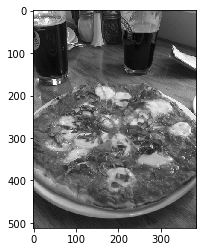

In [34]:
img = Image.open("../input/images/pizza/2965.jpg")
imgbw = np.array(img.convert("L"))
plt.imshow(imgbw, cmap="gray")

### We create our X_train,X_test and X_val to train out neural net

In [19]:
X=pictures['path']

In [20]:
y=pictures['dish_ord']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [32]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15)

In [33]:
X_train.shape

(72972,)

In [34]:
X_test.shape

(15150,)

In [35]:
X_val.shape

(12878,)

In [41]:
X_train.shape[0]+X_test.shape[0]+X_val.shape[0]

101000

### Divinding photos by classes

In [5]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [20]:
platos=datagen.flow_from_directory("../input/images/", target_size=(300, 375), color_mode='grayscale',class_mode='categorical',batch_size=128)

Found 101000 images belonging to 101 classes.


In [21]:
platos

### Now, we must define out net typology